<a href="https://colab.research.google.com/github/IshaIndhu/FlowerImage-Classification/blob/main/Inception_DL2_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
train_dir = "/content/drive/MyDrive/PROJECT_2/PROJECT_2/train/"
val_dir = "/content/drive/MyDrive/PROJECT_2/PROJECT_2/val/"

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folders = glob('/content/drive/MyDrive/PROJECT_2/PROJECT_2/train/*')

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=prediction)

model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
#!unzip "/content/drive/My Drive/PROJECT_2.zip" -d "/content/drive/My Drive/"

In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 32, target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = val_datagen.flow_from_directory(val_dir,  batch_size = 32, target_size = (224, 224))


Found 12753 images belonging to 104 classes.
Found 3712 images belonging to 104 classes.


In [ ]:
r1 = model.fit_generator(
  train_generator,
  validation_data=validation_generator,
  epochs=5,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
399/399 [==============================] - 3467s 9s/step - loss: 2.5764 - accuracy: 0.4047 - val_loss: 1.7474 - val_accuracy: 0.5463
Epoch 2/5
399/399 [==============================] - 216s 540ms/step - loss: 1.6643 - accuracy: 0.5596 - val_loss: 1.4298 - val_accuracy: 0.6309
Epoch 3/5
399/399 [==============================] - 213s 535ms/step - loss: 1.4334 - accuracy: 0.6145 - val_loss: 1.3565 - val_accuracy: 0.6433
Epoch 4/5
399/399 [==============================] - 214s 536ms/step - loss: 1.3166 - accuracy: 0.6420 - val_loss: 1.2864 - val_accuracy: 0.6624
Epoch 5/5
399/399 [==============================] - 214s 537ms/step - loss: 1.2435 - accuracy: 0.6594 - val_loss: 1.2659 - val_accuracy: 0.6654


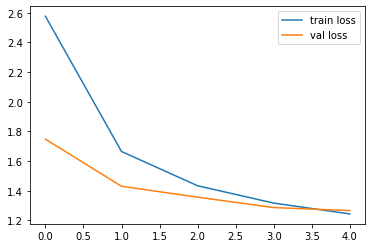

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

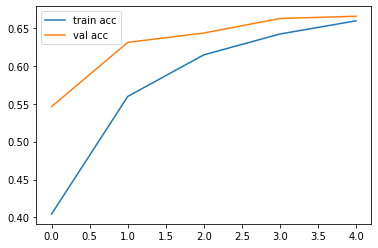

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r1.history['accuracy'], label='train acc')
plt.plot(r1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('DL2_Inception_model.h5')